**"СТРИМЧИК" - закономерности, определяющие успешность игр планирования рекламных стратегий**  

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv. Скачать датасет

**Done------------------**

**Шаг 2. Подготовьте данные**

Замените названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Done------------------**


**Шаг 3. Проведите исследовательский анализ данных**

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Done------------------**


**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?



**Шаг 5. Проверьте гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

Как вы сформулировали нулевую и альтернативную гипотезы;

Какой критерий применили для проверки гипотез и почему.



**Шаг 6. Напишите общий вывод**


**---------------------------------------------------------------------------------------------------------------**

**ЦЕЛИ:**

1. Нужно отработать принцип работы с данными;

2. Нужно выявить определяющие успешность игры закономерности;

3. Дать рекоммендации для планирования рекламных компаний.

**ОПИСАНИЕ ДАННЫХ**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**1. ИЗУЧИМ ДАННЫЕ**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [44]:
games = pd.read_csv('/datasets/games.csv')
display(games.head(10))
display(games.describe())
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Есть пропуски, не все строки в корректном формате, есть NANы. Проведем предобработку данных.*

**2. ПОДГОТОВИМ ДАННЫЕ**

**Заменим название столбцов по нижнему регистру**

In [45]:
games = games.rename(columns=str.lower)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Преобразуем данные в нужные типы**

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*1. Год преобразуем к формату int*

*2. User score к формату float64*

In [47]:
display(games['year_of_release'].unique())
games['year_of_release'].isna().sum()
#games['year_of_release'].value_counts()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

269

In [48]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')
display(games.head(10))
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


*Возникли проблемы при переводе формата в int, так как в строках были пропущенные значения nan, которое заменил на 2022 год, для определения пропуска даты выхода игры. Была мысль заменить пропуски на 2008 год, так как этом году выпущенно самое большое количество игр за изучаемый период, но преположил, что такая замена будет некорректной*

*По user_score сразу проверим уникальные значения, так как в описании задания уже указан парамент tbd, который необходимо обраотать*

In [7]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*Что и следовало ожидать tbd на месте). Кстати, эта абревиатура означет To Be Determined - Будет определено. Обычно относится к релизу игр.*

In [8]:
games[games['user_score'] == 'tbd']['user_score'].count()

2376

*tbd большое количество, грубо для нас это будет считаться пропуском, так как данные будут загружены в неопределенный срок. Так что заменим.*

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')
games[games['user_score'] == 'tbd']['user_score'].count()

0

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
games['user_score'] = games['user_score'].astype('float')

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Проаботаем пропуски**

In [13]:
games.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

*Name пропуски заменим на No_name, удалять не будем*

*Genre пропуски заменим на No_name_genre, удалять не будем*

*Сritic_score и User_score пропуски заменим на 0, преположим, что пропущение значения возникли в связи с нулевыми значениями, хотя в выгрузке в данных сроках есть и 0 рейтинги*

*Rating пропуски заменим на No_rating*

In [14]:
games = games.dropna(subset=['name','genre', 'critic_score', 'user_score' ])
games['rating'] = games['rating'].fillna('No_rating')
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [15]:
len(games)

6894

**Посчитаем суммарные продажи во всех регионах в отдельный столбец**

In [16]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


**Визуализируем количество релизов игр по годам**

*Для этого выведем гистограмму*

<AxesSubplot:ylabel='Frequency'>

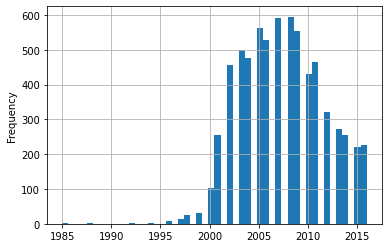

In [17]:
games['year_of_release'].plot(kind='hist', bins=50, grid=True)

*Видно, что первые релизы были 1980-х годах на очень малую аудиторию. Начало подъема выпуска игр можно считать 1995 год, связанный с развитием технологий (чипов). Пиком является 2008-2009 года, который можно связать с большой потребностью игр в мире. К 2010 году рынок игр стал переносыщенным + 27 января 2010 года был представлен iPad, что стало сигналом разработчикам и компаниям в игровом сегменте о переходе и увеличении аудитории на планшеты.
В связи с этим, интересен период с 1995 года по 2016 год, не за весь периоды необходимы данные* 

**Визуализируем продажи по платформам**

,total_sales
platform,
PS2,946.01
X360,853.67
PS3,785.44
Wii,659.23
DS,382.88
PS4,244.27
XB,212.22
PS,209.98
PC,189.85


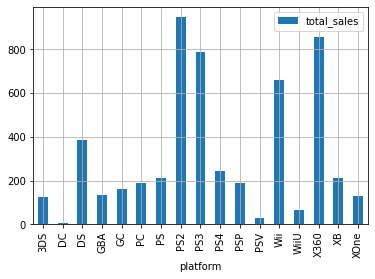

In [18]:
games.groupby('platform').agg({'total_sales':'sum'}).plot(kind='bar',grid=True)
games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False ).head(10)

*Топ 3 по продажам являются: PS2, X360, PS3*

ЧЕРНОВИК

#games[(games['platform'] == 'PS2') & (games['platform'] == 'X360') & (games['platform'] == 'PS3')].plot(kind='bar',grid=True,figsize=(50, 50))


#[(games['platform'] == 'PS2') & (games['platform'] == 'X360') & (games['platform'] == 'PS3')]


#pd.pivot_table(games,index=['year_of_release','platform'],values=['total_sales'],aggfunc=np.sum).plot(kind='bar',grid=True,figsize=(50, 50))

**Построим распределение по годам**

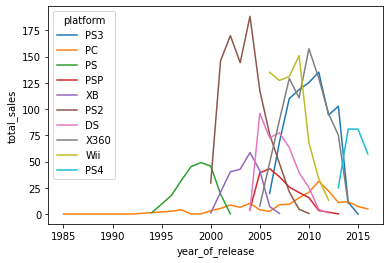

In [19]:
import seaborn as sns
N = 10
platforms = games.groupby(['platform']).total_sales.sum().sort_values(ascending=False).head(N).index.values
tmp = games[games['platform'].isin(platforms)]

sns.lineplot(data=tmp.groupby(['platform','year_of_release']).total_sales.sum().reset_index().sort_values('total_sales'), x='year_of_release', y='total_sales', hue='platform')
del tmp, platforms

<AxesSubplot:xlabel='year_of_release,platform'>

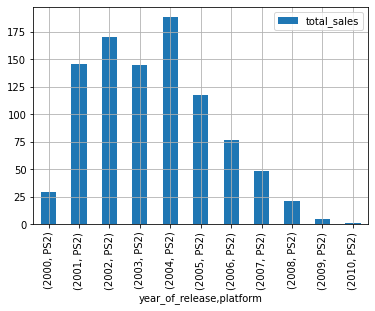

In [20]:
games[(games['platform'] == 'PS2')].pivot_table(index=['year_of_release','platform'],values=['total_sales'],aggfunc=np.sum).plot(kind='bar',grid=True)

<AxesSubplot:xlabel='year_of_release,platform'>

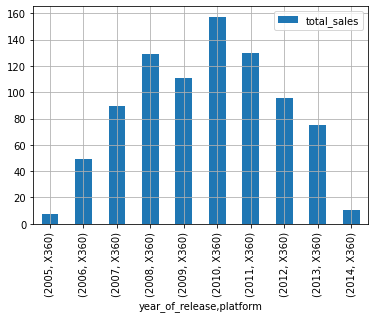

In [21]:
games[(games['platform'] == 'X360')].pivot_table(index=['year_of_release','platform'],values=['total_sales'],aggfunc=np.sum).plot(kind='bar',grid=True)

<AxesSubplot:xlabel='year_of_release,platform'>

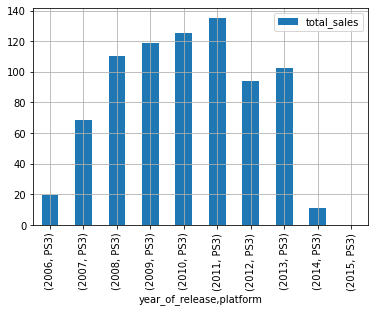

In [22]:
games[(games['platform'] == 'PS3')].pivot_table(index=['year_of_release','platform'],values=['total_sales'],aggfunc=np.sum).plot(kind='bar',grid=True)

*1. Видна активная динамика продаж с 2005 по 2016 гг. Что объясняется развитием игровых платформ и выскокй конкуренцией между ними.* 


*2. Взял топ 3 по продажам платформ: PS2, XBOX, PS3. Основная конкуренция была у PS3 и XBOX в 2010 и 2011 гг. PS2 в период своего подъема не имела конкурентов.* 


*3. С 2003 года видими характерное появление новых платформ, стариые исчезают в 2013 и 2014 году.* 


*4. Возьмем период 2005 - 2012 гг. Так как в данный промежуток было большее количество платформ и соотвественно продаж по ним.*

**5. Средний жизненний цикл игровой платформы состаляет 8-10 лет, согласно диаграммам**

In [23]:
release_period = games[games['year_of_release'] > 2013]
release_period['platform'].unique()

array(['PS4', 'WiiU', 'XOne', '3DS', 'PC', 'X360', 'PS3', 'PSV'],
      dtype=object)

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [24]:
top_6_platforms = ['PS4','XOne','PC','WiiU','3DS','PSV']
top_6_platforms_data = release_period[release_period['platform'].isin(['PS4','XOne','PC','WiiU','3DS','PSV'])]
top_6_platforms_data = top_6_platforms_data[top_6_platforms_data['total_sales']<1.4]

In [25]:
top_6_platforms_data['total_sales'].describe()

count    561.000000
mean       0.286239
std        0.324756
min        0.010000
25%        0.060000
50%        0.150000
75%        0.390000
max        1.380000
Name: total_sales, dtype: float64

In [26]:
top_6_platforms_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,43.0,0.304651,0.327555,0.01,0.080,0.210,0.370,1.38
PC,114.0,0.182105,0.233179,0.01,0.030,0.095,0.230,1.28
PS4,187.0,0.289679,0.314378,0.01,0.060,0.150,0.395,1.27
PSV,53.0,0.149434,0.127149,0.01,0.070,0.110,0.180,0.65
WiiU,37.0,0.431892,0.375091,0.01,0.110,0.380,0.640,1.30
XOne,127.0,0.383071,0.397427,0.01,0.075,0.240,0.565,1.38


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

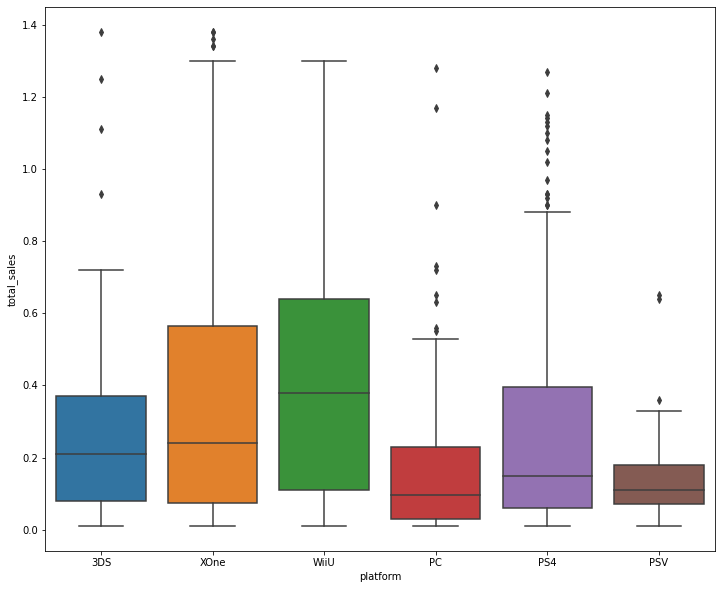

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(data=top_6_platforms_data, x='platform', y='total_sales')

*1. Медиана у всех платформ разная*

*2. Продажи распределились следующим образом по убыванию: WiiU, XOne, PS4, 3DS, PC, PSV*

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [28]:
PS4 = games[games['platform']=='PS4']
PS4['user_score'].corr(PS4['total_sales'])

-0.03362497596528878

*Связь отзывов пользователей и продаж есть, но слабая*

**Построим диаграммы рассеяния**

*Диаграмма по пользовтельским отзывам*

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

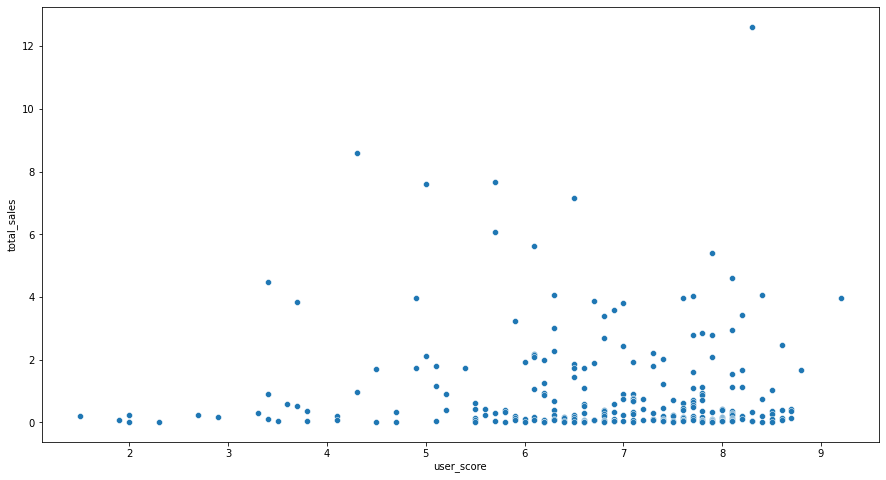

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)


*Диаграмма по отзывам критиков и корреляция*

In [30]:
PS4 = games[games['platform']=='PS4']
PS4['critic_score'].corr(PS4['total_sales'])

0.40589480145836687

*Связь между продажами и отзывами есть, сильнее, чем с отзывами пользователей*

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

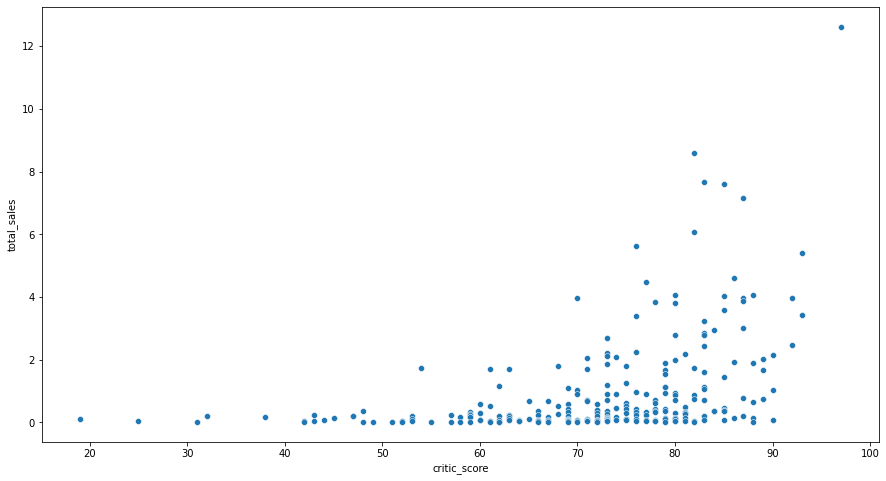

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)

**Соотнесем выводы с продажами игр на других платформах.**

In [32]:
def platforms (name):
    platform = games[games['platform']==name]
    fig, ax = plt.subplots(1 ,2, figsize=(20,10))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name, fontsize=15)
    
    user_correlation = platform['user_score'].corr(platform['total_sales'])
    critic_correlation = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.3 >= critic_correlation >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name.upper(), ': Слабая', critic_correlation)
    if 0.5 >= critic_correlation >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name.upper(), ': Умеренная', critic_correlation)
    if 0.7 >= critic_correlation >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name.upper(), ': Высокая', critic_correlation)
    if 0.9 >= critic_correlation >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name.upper(), ': Весьма высокая', critic_correlation)
    if 1 >= critic_correlation >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name.upper(), ': Сильная', critic_correlation)
    
    if 0.3 >= user_correlation >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name.upper(), ': Слабая', user_correlation)
    if 0.5 >= user_correlation >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name.upper(), ': Умеренная', user_correlation)
    if 0.7 >= user_correlation >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name.upper(), ': Высокая', user_correlation)
    if 0.9 >= user_correlation >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name.upper(), ': Весьма высокая', user_correlation)
    if 1 >= user_correlation >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name.upper(), ': Сильная', user_correlation)
    print('\n')
    

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40589480145836687


Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.41042203561296375


Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.257260981042733


Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.350882422488643
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.3918479505297129


Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.33890386446332155
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.23208872237663558


Корреляция между отзывами критиков и игровой платформой  PSV : Слабая 0.13161921121004788




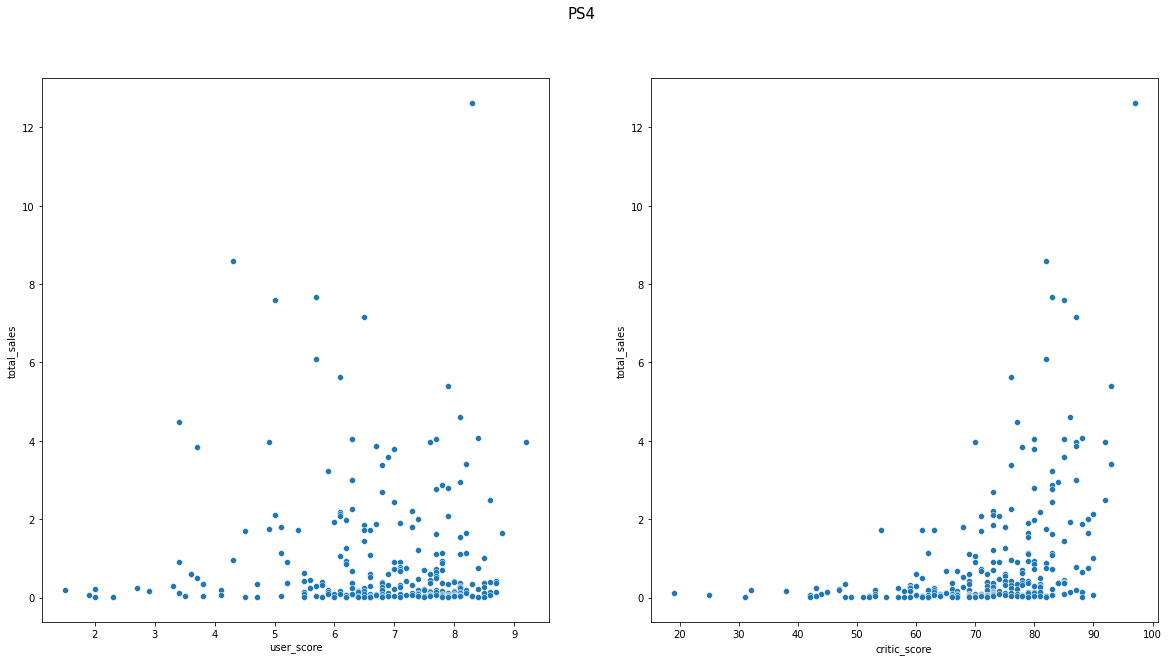

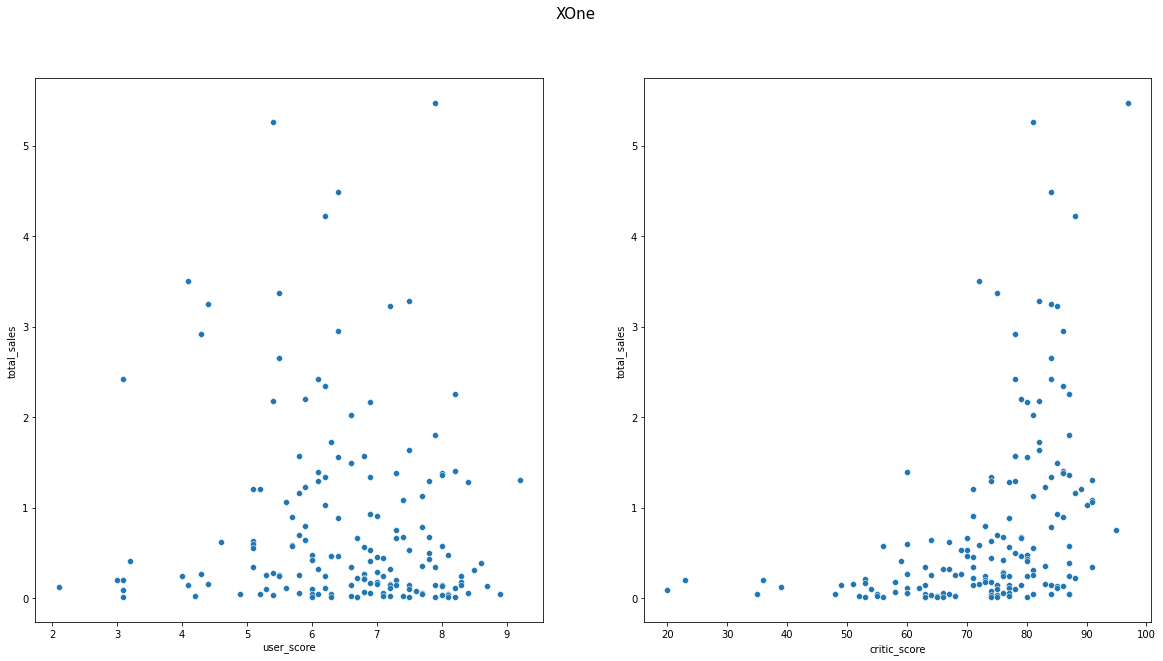

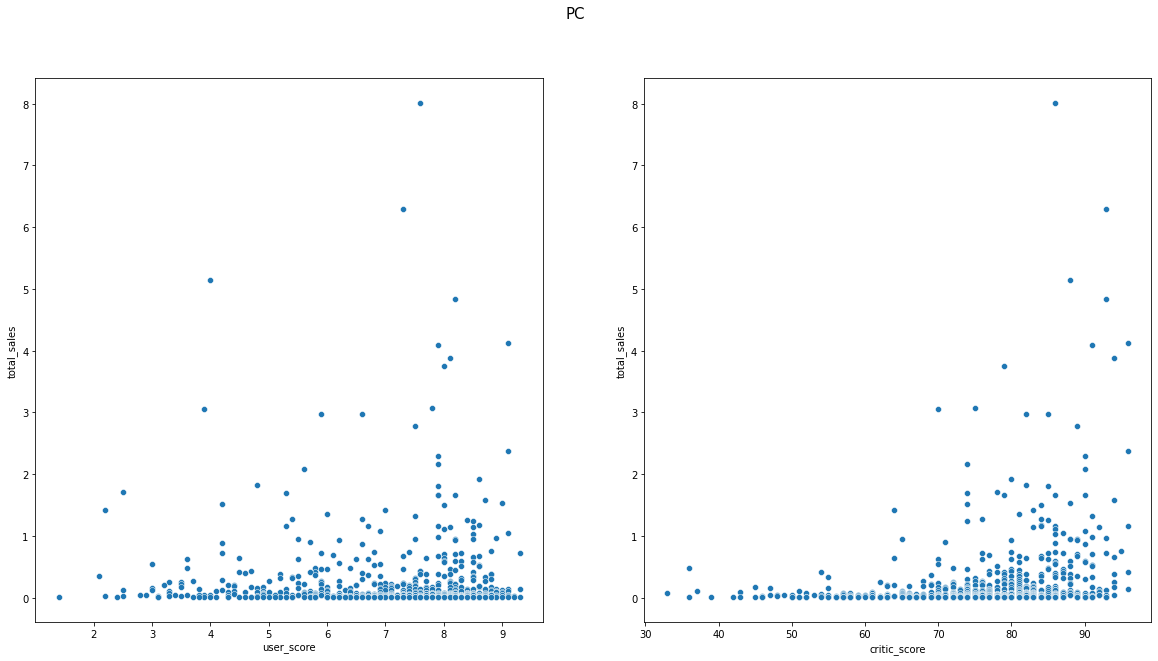

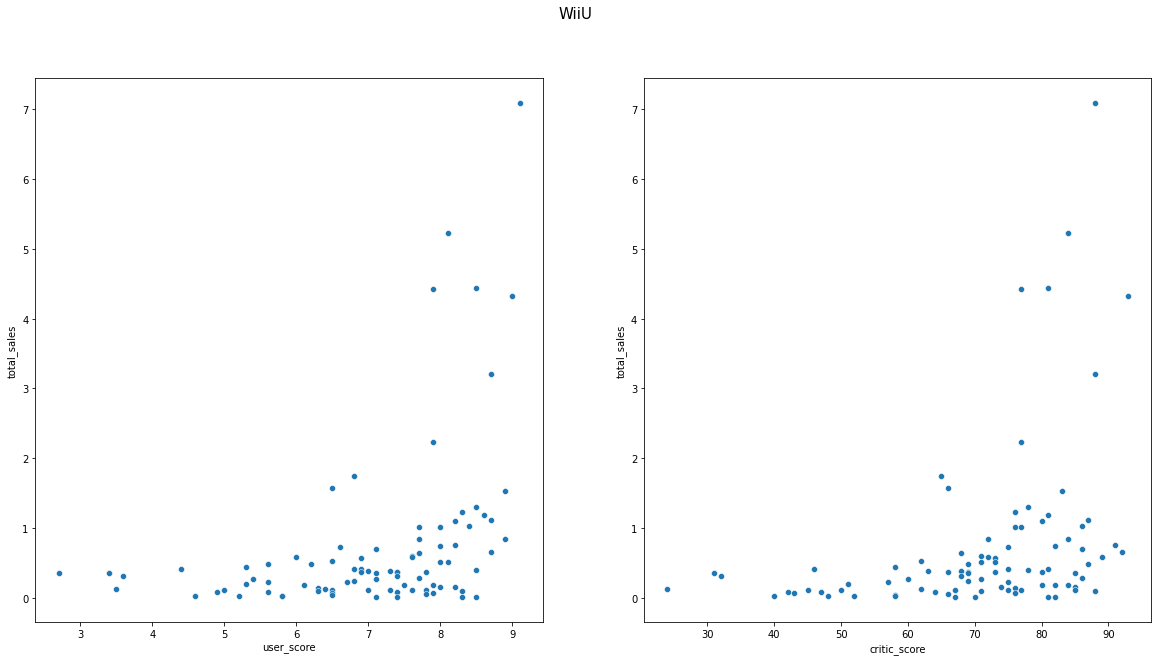

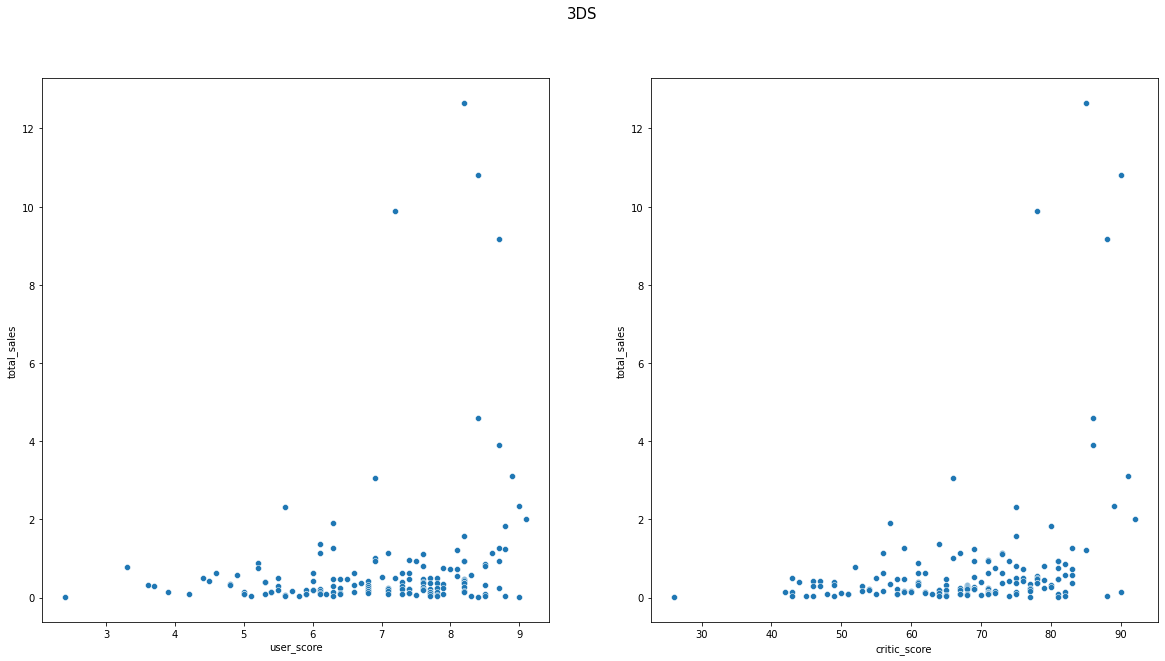

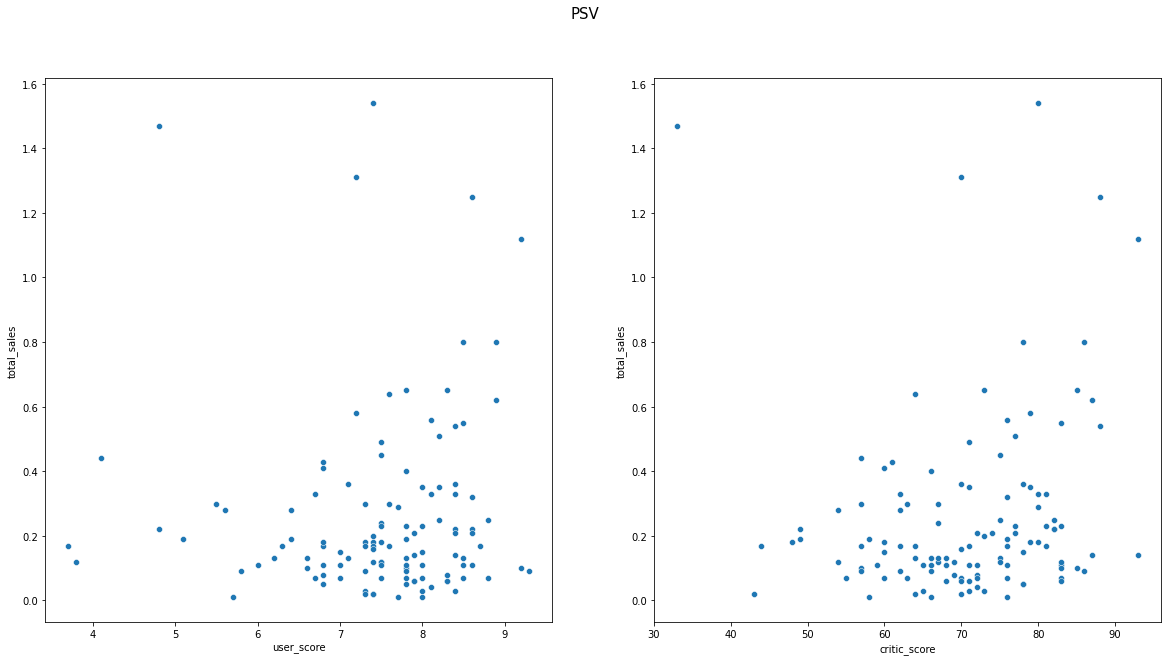

In [33]:
for platform in top_6_platforms:
    platforms(platform)

*У всех платформ, как и у топовой PS4, наблюдается связь между продажами и отзывами, но все связи слабые.*

**Посмотрим на общее распределение игр по жанрам.**

In [34]:
distribution_of_genres = top_6_platforms_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

distribution_of_genres

,genre,total_sales
0,Action,49.71
1,Shooter,25.00
2,Sports,21.61
3,Role-Playing,21.39
4,Misc,10.21
5,Fighting,8.11
6,Racing,6.64
7,Platform,6.52
8,Adventure,3.86
9,Simulation,3.58


*Action, Role-Playing и Shooter лидируют в выпуске на платформах*

**Посмотрим распределение жанров по продажам**

In [35]:
distribution_of_sales = top_6_platforms_data.groupby('genre').agg({'total_sales':'mean'}).reset_index()
display(distribution_of_sales.sort_values(by='total_sales', ascending=False).head(10))

,genre,total_sales
8,Shooter,0.438596
2,Fighting,0.368636
10,Sports,0.354262
3,Misc,0.340333
5,Puzzle,0.320000
4,Platform,0.296364
7,Role-Playing,0.277792
0,Action,0.260262
9,Simulation,0.210588
6,Racing,0.207500


In [36]:
distribution_of_sales = top_6_platforms_data.groupby('genre').agg({'total_sales':'median'}).reset_index()
display(distribution_of_sales.sort_values(by='total_sales', ascending=False).head(10))

,genre,total_sales
8,Shooter,0.370
3,Misc,0.320
10,Sports,0.240
2,Fighting,0.165
7,Role-Playing,0.160
4,Platform,0.140
9,Simulation,0.140
0,Action,0.130
11,Strategy,0.105
6,Racing,0.095


*Рассмотрел средние и медианные значения по жанрам. Как видно из таблиц, Shooter показывает топовые среднее значение и медиану*

**4. СОСТАВИМ ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА**

**Определим самые популярные платформы (топ-5)**

<AxesSubplot:xlabel='platform'>

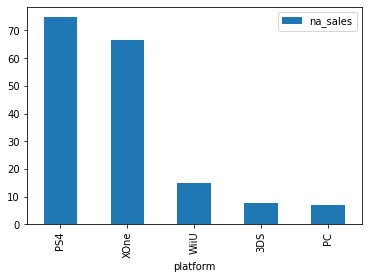

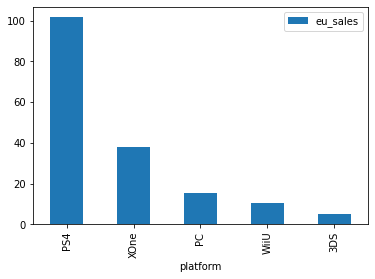

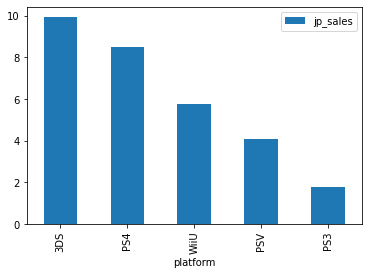

In [37]:
release_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
release_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
release_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

*В Америке предпочитают игры на платформе PS4, хотя, если брать данные с 2009 года, то в лидерах XONE, видимо с 2013 года на PS4 выпусколось больше игр и с более лучшим интерффейсом. В Европе доминирует также PS4. Интересно, что в Японии, игроки предпочитают портативную 3DS, видимо японские игроманы более подвижны.*  

**Определим Самые популярные жанры (топ-5)**

<AxesSubplot:xlabel='genre'>

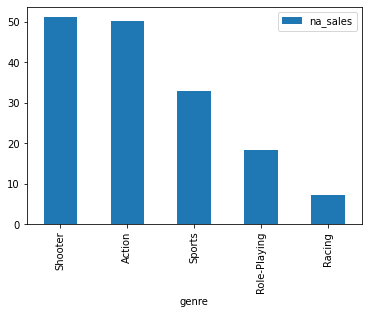

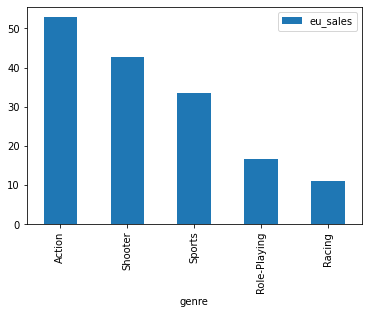

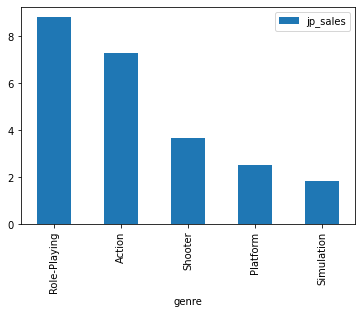

In [38]:
release_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
release_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
release_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

*В Северной Америке больше любат Shooter, а в Европе Action. Японцы предпочитают ролевые игры, так как очень много игр такого жанра выпускают именно в Японии.*

**Рассмотрим влияние ESRB на продажи в каждом регионе**

<AxesSubplot:xlabel='rating'>

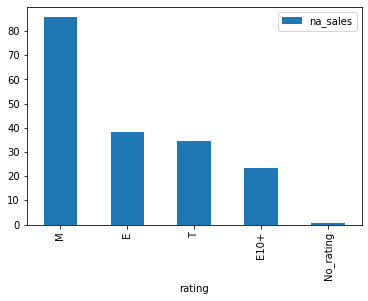

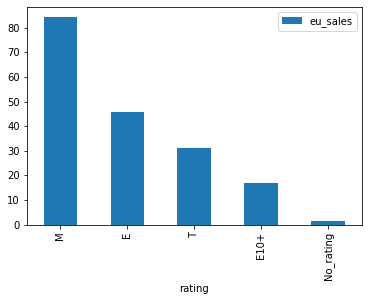

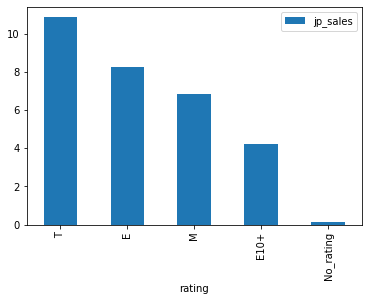

In [39]:
release_period.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
release_period.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
release_period.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

*Все (E) это базовый рейтинг. Игры с таким рейтингом имеют контент, который «в целом подходит для всех возрастов». Они могут содержать незначительные случаи мультипликационного насилия или комического вреда.
Данный рейтинг привалирует во всех регионах. В Японии, из-за некорректной выгрузки, много занчений без рейтинг. Если их не брать в счет, то рейтинг Е, также в топе в Японии.*

**СДЕЛАНО**

**5. ПРОВЕРИМ ГИПОТЕЗЫ**

**Проверим гипотезу - "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый

H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [40]:
alpha = 0.05

In [41]:
xone = release_period[(release_period['platform'] == 'XOne') & (release_period['user_score'] > 0)]['user_score']
pc = release_period[(release_period['platform'] == 'PC') & (release_period['user_score'] > 0)]['user_score']
results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


**СДЕЛАНО**

**Проверим гипотезу - "cредние пользовательские рейтинги жанров Action и Sports разные."**

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [42]:
action = release_period[(release_period['genre'] == 'Action') & (release_period['user_score'] > 0)]['user_score']
sports = release_period[(release_period['genre'] == 'Sports') & (release_period['user_score'] > 0)]['user_score']
results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.0540895999943536e-10
Отвергаем нулевую гипотезу


**СДЕЛАНО**

*При проверке гипотез использовали функцию ttest_ind, вычисляющей t-тест двух независимых выборок:*

*Гипотезу  "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые" - отвергаем, рейтинги разные.* 
*Гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" - не отвергаем.*

**6. ОБЩИЙ ВЫВОД:** 

*Анализ показал, что пик динамики по выпуску игр пришелся на период 1990 - 2008 гг., после чего был спад в связи с разарботкой мобильных платформ и игр.* 

*Наиболее популярными приставками среди пользователей стали: PS2, X360, PS3, WII, DS, PS*

*У ТОП-5 платформ есть слабая связь между продажами и оценками пользователе, при этом связь с оценками критиков плотнее, что говорит о влиянии именно критиков на продажи игр.* 

*Топ жанром за изучаемый период является Action. Минимальное количество продаж в жанре Strategy.*

*В Северной Америке:*
*Топ платформы: XBOX, PS2, WII, PS3, DS*
*Топ жанры: action, sports, shooter, platform, misc*
*Топ игр с рейтингом "Е"(для всех).*

*В Европе:*
*Топ платформы: PS2, PS3, XBOX, WII, PS*
*Топ жанры: action, sports, shooter, racing, misc*
*Топ игр с рейтингом "Е"(для всех).*

*В Японии:*
*Топ платформы: DS, PS, PS2, SNES, 3DS*
*Топ жанры: role-playing, action, sports, platform, misc*
*Топ игр с рейтингом "Е"(для всех).*

*В 2017 году необходимо делать упор на жанрах action, sports и shooter, так как за весь исследуемый период, данные жанр остаются в топах. Технологии постоянно развиваются, но топы мы видим в одних производителях PS и Xbox.* 
